# Binary classification
In this Colab, we will complete the following tasks:
i. Examine a dataset containing measurements derived from images of two species of Turkish rice.
ii. Create a binary classifier to sort grains of rice into the two species.
iii. Evaluate the performance of the model.

# Dataset
This Colab uses the Cinar and Koklu 2019 Osmancik and Cammeo rice dataset.
[dataSet](https://www.kaggle.com/datasets/muratkokludataset/rice-dataset-commeo-and-osmancik)

# Load The imports

In [27]:
# @title load the imports
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib.lines import Line2D
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("run the import statements")

run the import statements


# Load the dataset

In [5]:
# @title Load the dataset
rice_dataset_raw = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv")

In [6]:
rice_dataset_raw.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.0,3810.0,3810.0,3810.0,3810.0,3810.0,3810.0
mean,12667.7,454.2,188.8,86.3,0.9,12952.5,0.7
std,1732.4,35.6,17.4,5.7,0.0,1777.0,0.1
min,7551.0,359.1,145.3,59.5,0.8,7723.0,0.5
25%,11370.5,426.1,174.4,82.7,0.9,11626.2,0.6
50%,12421.5,448.9,185.8,86.4,0.9,12706.5,0.6
75%,13950.0,483.7,203.6,90.1,0.9,14284.0,0.7
max,18913.0,548.4,239.0,107.5,0.9,19099.0,0.9


rice_dataset_raw.head()


In [14]:
rice_dataset = rice_dataset_raw[[
    'Area',
    'Perimeter',
    'Major_Axis_Length',
    'Minor_Axis_Length',
    'Eccentricity',
    'Convex_Area',
    'Extent',
    'Class',
]]

rice_dataset.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.0,3810.0,3810.0,3810.0,3810.0,3810.0,3810.0
mean,12667.7,454.2,188.8,86.3,0.9,12952.5,0.7
std,1732.4,35.6,17.4,5.7,0.0,1777.0,0.1
min,7551.0,359.1,145.3,59.5,0.8,7723.0,0.5
25%,11370.5,426.1,174.4,82.7,0.9,11626.2,0.6
50%,12421.5,448.9,185.8,86.4,0.9,12706.5,0.6
75%,13950.0,483.7,203.6,90.1,0.9,14284.0,0.7
max,18913.0,548.4,239.0,107.5,0.9,19099.0,0.9


# Explore the data set

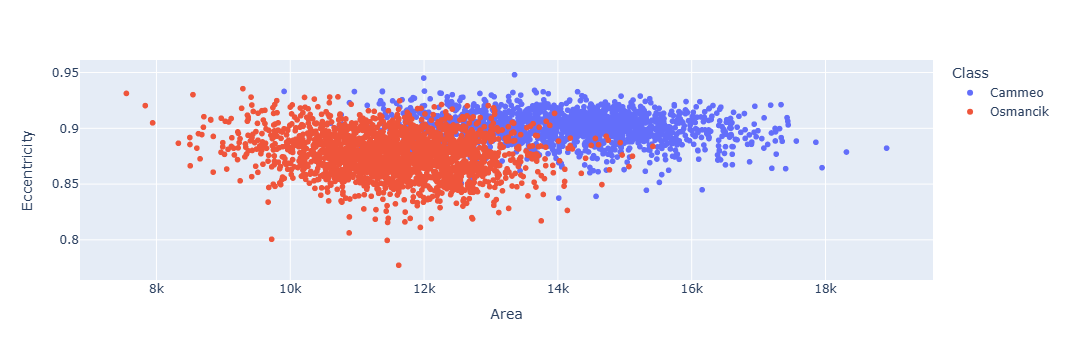

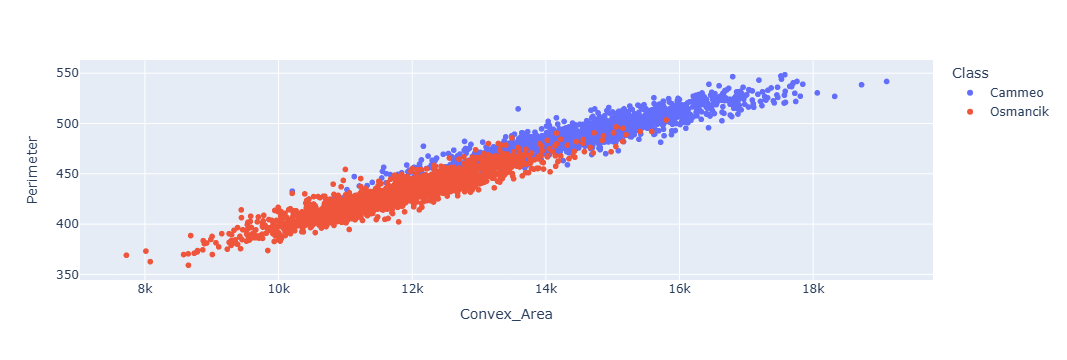

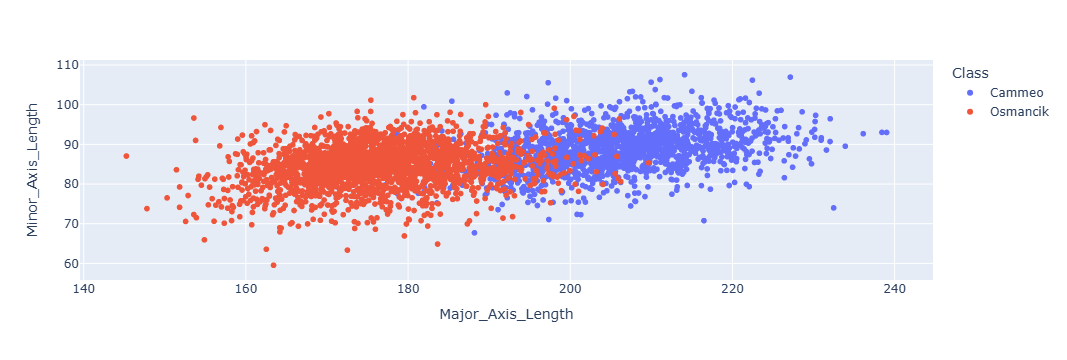

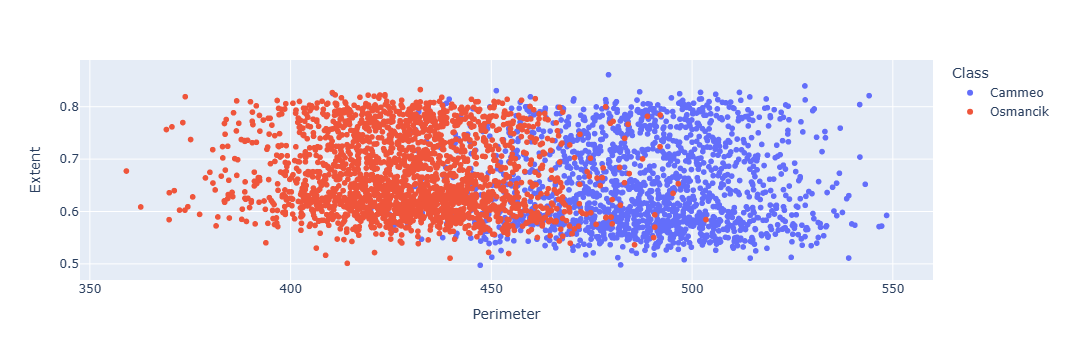

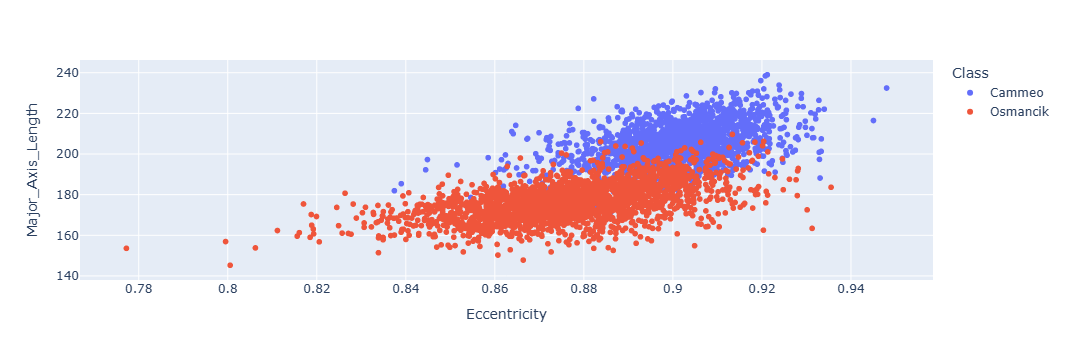

In [17]:
# Create five 2D plots of the features against each other, color-coded by class.
for x_axis_data, y_axis_data in [
    ('Area', 'Eccentricity'),
    ('Convex_Area', 'Perimeter'),
    ('Major_Axis_Length', 'Minor_Axis_Length'),
    ('Perimeter', 'Extent'),
    ('Eccentricity', 'Major_Axis_Length'),
]:
  px.scatter(rice_dataset, x=x_axis_data, y=y_axis_data, color='Class').show()

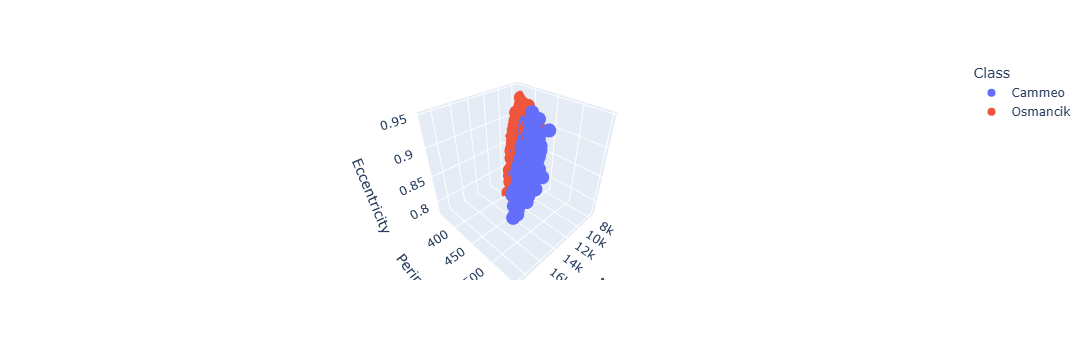

In [21]:
# Replace input() with direct assignment
x_axis_data = 'Area'
y_axis_data = 'Perimeter'
z_axis_data = 'Eccentricity'

px.scatter_3d(
    rice_dataset,
    x=x_axis_data,
    y=y_axis_data,
    z=z_axis_data,
    color='Class',
).show()

# Normalize Data


In [24]:
# Calculate the Z-scores of each numerical column in the raw data and write
# them into a new DataFrame named df_norm

feature_mean = rice_dataset.mean(numeric_only=True)
feature_std = rice_dataset.std(numeric_only=True)
numerical_features = rice_dataset.select_dtypes('number').columns

normalized_dataset = (rice_dataset[numerical_features] - feature_mean)/feature_std

# Copy the class to the new dataframe
normalized_dataset['Class'] = rice_dataset['Class']

normalized_dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.5,2.0,2.3,-0.2,2.0,1.5,-1.2,Cammeo
1,1.1,1.1,1.0,0.9,0.4,1.2,-0.6,Cammeo
2,1.1,1.3,1.5,0.3,1.2,1.1,0.4,Cammeo
3,0.3,0.1,0.3,0.2,0.2,0.2,-0.3,Cammeo
4,1.2,1.5,1.3,0.5,1.0,1.3,-0.2,Cammeo


In [29]:
# Encode target variable
normalized_dataset['Class'] = (normalized_dataset['Class'] == 'Osmancik').astype(int)

In [30]:
from sklearn.model_selection import train_test_split

X = normalized_dataset.drop('Class', axis=1)
y = normalized_dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score

for model, name in zip([lr, rf, svm], ['Logistic Regression', 'Random Forest', 'SVM']):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} ROC AUC: {roc_auc_score(y_test, y_proba):.2f}\n")

Logistic Regression Accuracy: 0.93
Logistic Regression ROC AUC: 0.98

Random Forest Accuracy: 0.92
Random Forest ROC AUC: 0.98

SVM Accuracy: 0.94
SVM ROC AUC: 0.97

